In [109]:
from sxcsscvssc import BasicModel, InverseModel
import pandas as pd
import numpy as np
from datetime import datetime

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas_datareader as pdr

import seaborn as sns

In [110]:
#chargement dataset nasdaq
start_date = '1998-01-01'
end_date = datetime.now()
df = pdr.DataReader('^NDX', 'yahoo', start_date, end_date)

#on passe l'index Date en colomne
df = df.rename_axis('Date').reset_index()

#delete Adj Close (pareil que Close)
df = df.drop('Adj Close', 1)

In [111]:
df.head()

Date         High          Low         Open        Close     Volume
0 1998-01-02  1008.229980   987.719971   990.799988  1008.229980  434140000
1 1998-01-05  1028.619995  1007.250000  1008.229980  1017.419983  681560000
2 1998-01-06  1018.219971  1001.940002  1017.419983  1006.289978  635700000
3 1998-01-07  1006.289978   978.700012  1006.289978   991.190002  691340000
4 1998-01-08  1003.710022   982.270020   990.969971   994.549988  645050000

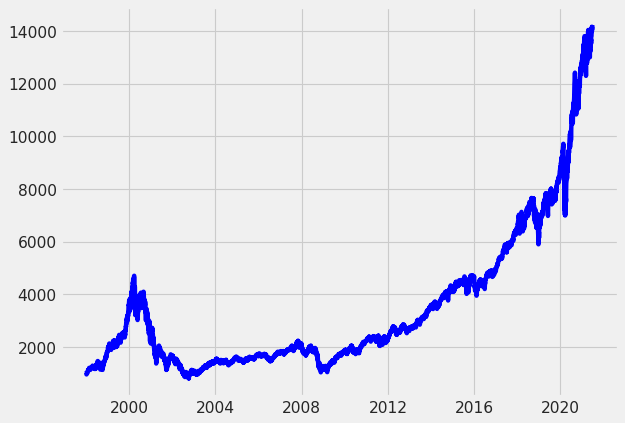

In [112]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(df.Date, df.Close, color="b")

<h1>Partie 1 : Moyenne mobile prix 100 périodes (MM100)</h1>

In [322]:
#on créé les columns (différentes pour chaque modèle)
indicator, activity, portefeuille, portefeuille_frais = "MM100_indicator", "MM100_acivity", "MM100_pf", "MM100_pf_frais"
df[indicator], df[activity], df[portefeuille], df[portefeuille_frais] = 0,0,0,0

In [323]:
#indicateur MM100
df[indicator] = df.Close.rolling(window=100).mean()

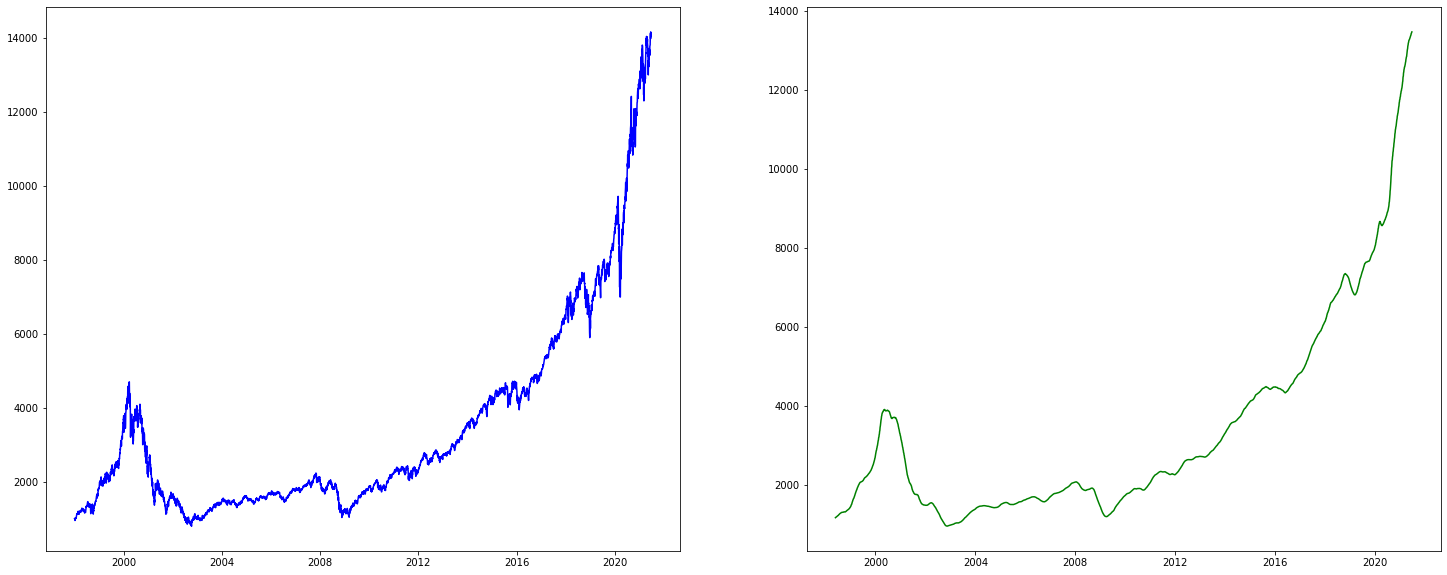

In [324]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25, 10))
ax1.plot(df.Date, df.Close, color="b")
ax2.plot(df.Date, df[indicator], color="g")
plt.show()

In [325]:
model_mm100 = BasicModel(df, indicator, activity, portefeuille, portefeuille_frais, frais = 2.5)

1998-08-31 00:00:00 || GO SELL || 166 || 1140.3399658203125 || 1140.3399658203125 || 1137.8399658203125
1998-09-01 00:00:00 || GO BUY || 167 || 1215.06005859375|| 1215.06005859375 || 1209.896247592178

1998-09-03 00:00:00 || GO SELL || 169 || 1208.9599609375 || 1208.9599609375 || 1201.3220743757654
1998-09-08 00:00:00 || GO BUY || 171 || 1286.469970703125|| 1290.2586185844489 || 1279.6071087888668

1998-09-10 00:00:00 || GO SELL || 173 || 1235.3699951171875 || 1239.0081538159823 || 1226.2797334845172
1998-09-11 00:00:00 || GO BUY || 174 || 1290.199951171875|| 1293.9995838277541 || 1278.2062325604738

1998-10-05 00:00:00 || GO SELL || 190 || 1207.6800537109375 || 1211.2366656653608 || 1193.9534413368983
1998-10-12 00:00:00 || GO BUY || 195 || 1243.4000244140625|| 1257.2747508482173 || 1236.8346057243205

1998-10-13 00:00:00 || GO SELL || 196 || 1206.9000244140625 || 1220.3674583398508 || 1198.027333549212
1998-10-14 00:00:00 || GO BUY || 197 || 1235.6700439453125|| 1249.458513855228 || 

2005-03-22 00:00:00 || GO SELL || 1814 || 1465.0899658203125 || 4050.196208513412 || 3737.363663505878
2005-06-01 00:00:00 || GO BUY || 1863 || 1559.5|| 4094.4886117760225 || 3775.7349719563367

2005-06-03 00:00:00 || GO SELL || 1865 || 1544.47998046875 || 4055.053344754954 || 3736.8697183342733
2005-06-14 00:00:00 || GO BUY || 1872 || 1524.4200439453125|| 4042.563142618911 || 3722.8595718158745

2005-06-23 00:00:00 || GO SELL || 1879 || 1515.949951171875 || 4020.101561248042 || 3699.674350520732
2005-06-28 00:00:00 || GO BUY || 1882 || 1508.6099853515625|| 4060.093963130512 || 3733.979108113562

2005-06-29 00:00:00 || GO SELL || 1883 || 1504.1099853515625 || 4047.9831969208944 || 3720.3411028307746
2005-07-11 00:00:00 || GO BUY || 1890 || 1547.6600341796875|| 4085.9742466109738 || 3752.7571725934154

2005-10-12 00:00:00 || GO SELL || 1956 || 1521.18994140625 || 4016.090606154372 || 3686.072643484356
2005-10-14 00:00:00 || GO BUY || 1958 || 1544.2900390625|| 4043.557518331818 || 3708.7

2018-10-24 00:00:00 || GO SELL || 5237 || 6789.14990234375 || 20852.96281962471 || 18555.79960356745
2019-03-08 00:00:00 || GO BUY || 5328 || 7015.68994140625|| 20819.755558935787 || 18523.750456040692

2019-03-13 00:00:00 || GO SELL || 5331 || 7256.97998046875 || 21535.807675554894 || 19158.336260637432
2019-03-15 00:00:00 || GO BUY || 5333 || 7306.990234375|| 21726.042276166805 || 19325.069683494752

2019-08-23 00:00:00 || GO SELL || 5445 || 7464.990234375 || 22195.827313443235 || 19740.438178190143
2019-08-26 00:00:00 || GO BUY || 5446 || 7575.02001953125|| 22522.981406615047 || 20028.901207402778

2019-09-03 00:00:00 || GO SELL || 5451 || 7609.509765625 || 22625.530562654963 || 20117.59459242342
2019-09-04 00:00:00 || GO BUY || 5452 || 7719.25|| 22951.82372782321 || 20405.219661400508

2019-09-24 00:00:00 || GO SELL || 5466 || 7710.0400390625 || 22924.43953894766 || 20378.373866666232
2019-09-27 00:00:00 || GO BUY || 5469 || 7681.580078125|| 22657.7636813928 || 20138.81593043037

2

In [326]:
df[185:200]

Date         High          Low         Open        Close  \
185 1998-09-28  1413.160034  1367.739990  1390.089966  1383.250000   
186 1998-09-29  1400.390015  1369.040039  1383.300049  1384.890015   
187 1998-09-30  1384.439941  1343.599976  1384.439941  1345.479980   
188 1998-10-01  1345.479980  1266.380005  1345.479980  1273.739990   
189 1998-10-02  1285.689941  1228.699951  1273.739990  1276.439941   
190 1998-10-05  1267.489990  1174.939941  1267.489990  1207.680054   
191 1998-10-06  1250.400024  1174.400024  1207.680054  1184.839966   
192 1998-10-07  1204.869995  1139.339966  1184.099976  1151.089966   
193 1998-10-08  1144.689941  1063.270020  1144.689941  1128.880005   
194 1998-10-09  1199.130005  1128.880005  1128.880005  1197.869995   
195 1998-10-12  1258.869995  1198.420044  1198.420044  1243.400024   
196 1998-10-13  1243.400024  1199.300049  1243.400024  1206.900024   
197 1998-10-14  1253.430054  1173.449951  1206.500000  1235.670044   
198 1998-10-15  1300.510010  1231.729980  1235.670044  1299.660034   
199 1998-10-16  1318.329956  1288.859985  1299.660034  1293.910034   

         Volume  MM100_indicator  MM100_acivity     MM100_pf  MM100_pf_frais  
185   696680000      1307.404993              1  1387.323665     1370.391287  
186   781710000      1309.027092              1  1388.968509     1372.016056  
187   737760000      1309.941592              1  1349.442413     1332.972378  
188   856960000      1310.302391              1  1277.491148     1261.899284  
189   871450000      1310.502690              1  1280.199051     1264.574136  
190   877180000      1309.948691              0  1211.236666     1193.953441  
191   887180000      1309.135591              0  1211.236666     1193.953441  
192   940230000      1308.151591              0  1211.236666     1193.953441  
193  1209510000      1307.015391              0  1211.236666     1193.953441  
194   892830000      1306.438191              0  1211.236666     1193.953441  
195   764820000      1306.494691              1  1257.274751     1236.834606  
196   663540000      1306.326692              0  1220.367458     1198.027334  
197   750050000      1306.542092              1  1249.458514     1224.085846  
198   841670000      1307.537493              1  1314.162549     1287.475941  
199   977090000      1308.381993              1  1308.348387     1281.779847

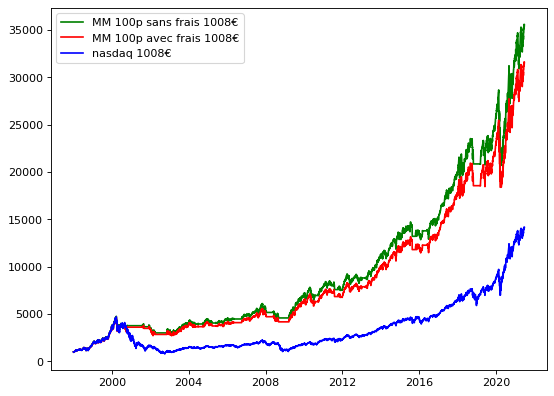

In [327]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(df['Date'], df[portefeuille], color="g", label="MM 100p sans frais 1008€")
plt.plot(df['Date'], df[portefeuille_frais], color="r", label="MM 100p avec frais 1008€")
plt.plot(df['Date'], df.Close, color="b", label="nasdaq 1008€")
plt.legend(loc="upper left")
plt.show()

In [328]:
model_mm100.stats(portefeuille, portefeuille_frais)

Départ : 1008€

Stratégie sans frais final : 35533€
Stratégie avec frais final: 31558€
Sans stratégie final: 14137€

Total frais: 500€
Total transactions: 200


<h1>Partie 2 : Moyenne mobile prix 20 périodes (MM20)</h1>

In [329]:
#on créé les columns (différentes pour chaque modèle)
indicator, activity, portefeuille, portefeuille_frais = "MM20_indicator", "MM20_acivity", "MM20_pf", "MM20_pf_frais"
df[indicator], df[activity], df[portefeuille], df[portefeuille_frais] = 0,0,0,0

In [330]:
#indicateur MM20
df[indicator] = df.Close.rolling(window=20).mean()

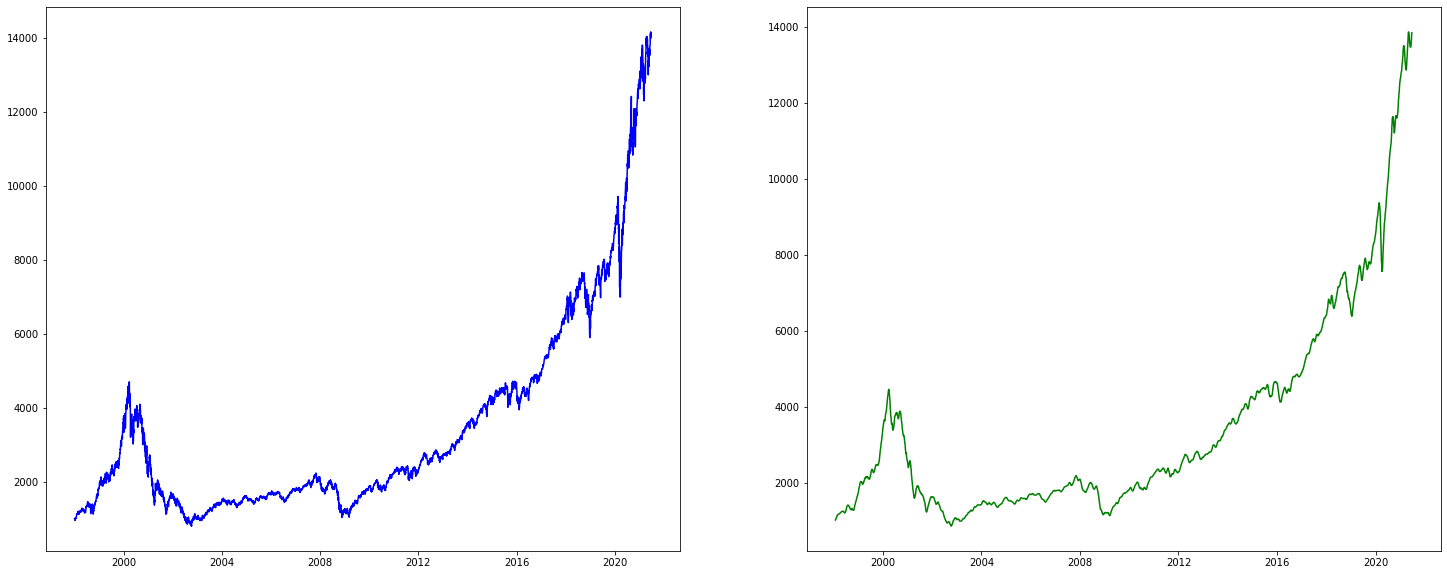

In [331]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25, 10))
ax1.plot(df.Date, df.Close, color="b")
ax2.plot(df.Date, df[indicator], color="g")
plt.show()

In [332]:
model_mm20 = BasicModel(df, indicator, activity, portefeuille, portefeuille_frais, frais = 2.5)

1998-03-09 00:00:00 || GO SELL || 44 || 1128.3699951171875 || 1128.3699951171875 || 1125.8699951171875
1998-03-10 00:00:00 || GO BUY || 45 || 1148.6099853515625|| 1148.6099853515625 || 1143.5651419262633

1998-03-23 00:00:00 || GO SELL || 54 || 1179.1800537109375 || 1179.1800537109375 || 1171.50094259657
1998-03-24 00:00:00 || GO BUY || 55 || 1197.81005859375|| 1197.81005859375 || 1187.5096242962893

1998-05-18 00:00:00 || GO SELL || 93 || 1242.5 || 1242.5 || 1229.3152595248523
1998-06-19 00:00:00 || GO BUY || 116 || 1239.7099609375|| 1255.0330242214093 || 1239.2152900466817

1998-08-04 00:00:00 || GO SELL || 147 || 1317.239990234375 || 1333.5213402004538 || 1314.2143831973078
1998-09-23 00:00:00 || GO BUY || 182 || 1394.6500244140625|| 1391.8646683643842 || 1369.2130063727811

1998-09-24 00:00:00 || GO SELL || 183 || 1356.4599609375 || 1353.7508770152228 || 1329.2194913611706
1998-09-25 00:00:00 || GO BUY || 184 || 1390.0899658203125|| 1387.3137169922086 || 1359.6741374783408

1998-10

2002-05-24 00:00:00 || GO BUY || 1103 || 1253.030029296875|| 3971.988397647909 || 3575.578168799973

2002-05-28 00:00:00 || GO SELL || 1104 || 1244.8199462890625 || 3945.963199776908 || 3549.65032359243
2002-06-04 00:00:00 || GO BUY || 1109 || 1178.800048828125|| 4012.8555532941355 || 3607.3243425294822

2002-06-06 00:00:00 || GO SELL || 1111 || 1157.6199951171875 || 3940.754694257442 || 3540.0098530802316
2002-08-16 00:00:00 || GO BUY || 1161 || 996.0599975585938|| 4001.3335534793073 || 3591.928302126619

2002-08-27 00:00:00 || GO SELL || 1168 || 974.469970703125 || 3914.6029357564285 || 3511.5717184911837
2002-08-29 00:00:00 || GO BUY || 1170 || 961.75|| 3984.705508256248 || 3571.956822044164

2002-09-05 00:00:00 || GO SELL || 1174 || 882.9199829101562 || 3658.0983823775528 || 3276.6807187679224
2002-09-10 00:00:00 || GO BUY || 1177 || 947.719970703125|| 3718.881568293671 || 3328.6262455137567

2002-09-12 00:00:00 || GO SELL || 1179 || 915.010009765625 || 3590.526701254386 || 3211.24

2006-06-21 00:00:00 || GO BUY || 2129 || 1573.56005859375|| 7433.759920806114 || 6326.862704846934

2006-06-22 00:00:00 || GO SELL || 2130 || 1554.489990234375 || 7343.669740210374 || 6247.687077740819
2006-07-03 00:00:00 || GO BUY || 2137 || 1586.25|| 7395.0447044832645 || 6288.894748668562

2006-07-05 00:00:00 || GO SELL || 2138 || 1553.949951171875 || 7244.46295189636 || 6158.336997710684
2006-07-11 00:00:00 || GO BUY || 2142 || 1533.06005859375|| 7302.384521818405 || 6205.074677492461

2006-07-12 00:00:00 || GO SELL || 2143 || 1501.4599609375 || 7151.86461053416 || 6074.672991792719
2006-08-10 00:00:00 || GO BUY || 2164 || 1496.280029296875|| 7203.085595072419 || 6115.679230841104

2006-12-13 00:00:00 || GO SELL || 2251 || 1783.43994140625 || 8585.472171045965 || 7286.875247650685
2006-12-14 00:00:00 || GO BUY || 2252 || 1803.4100341796875|| 8681.60811135936 || 7365.970131417451

2006-12-18 00:00:00 || GO SELL || 2254 || 1790.989990234375 || 8621.81807347809 || 7312.740862422517
20

2010-08-19 00:00:00 || GO SELL || 3177 || 1823.0 || 16788.834445530287 || 13918.78216821641
2010-09-09 00:00:00 || GO BUY || 3191 || 1886.1400146484375|| 16843.666195224832 || 13961.740426940485

2010-11-23 00:00:00 || GO SELL || 3244 || 2116.610107421875 || 18901.817382575497 || 15665.24506418127
2010-11-24 00:00:00 || GO BUY || 3245 || 2160.52001953125|| 19293.943044768093 || 15987.726756146194

2010-11-30 00:00:00 || GO SELL || 3248 || 2117.330078125 || 18908.246887331024 || 15665.623616358162
2010-12-01 00:00:00 || GO BUY || 3249 || 2162.830078125|| 19314.57240183721 || 15999.767336630393

2011-02-23 00:00:00 || GO SELL || 3306 || 2300.93994140625 || 20547.925396477483 || 17018.94985424615
2011-02-25 00:00:00 || GO BUY || 3308 || 2346.2900390625|| 20840.869343066777 || 17259.082540559233

2011-03-07 00:00:00 || GO SELL || 3314 || 2328.070068359375 || 20679.030856546982 || 17122.558198718936
2011-03-29 00:00:00 || GO BUY || 3330 || 2325.5400390625|| 20880.514170811603 || 17286.88950

2014-10-23 00:00:00 || GO BUY || 4229 || 4012.27001953125|| 45123.923755898955 || 37007.837644130785

2014-10-24 00:00:00 || GO SELL || 4230 || 4042.02001953125 || 45458.50660431224 || 37279.74170082523
2014-10-28 00:00:00 || GO BUY || 4232 || 4106.6298828125|| 46139.48046429239 || 37835.69668541256

2014-12-12 00:00:00 || GO SELL || 4264 || 4199.27978515625 || 47180.43581726917 || 38686.80991646675
2014-12-18 00:00:00 || GO BUY || 4268 || 4267.77001953125|| 48343.435876286545 || 39637.94168007111

2014-12-23 00:00:00 || GO SELL || 4271 || 4279.2998046875 || 48474.04024972224 || 39742.52733593253
2015-01-15 00:00:00 || GO BUY || 4286 || 4089.64990234375|| 47817.05551707217 || 39201.3836915793

2015-01-16 00:00:00 || GO SELL || 4287 || 4142.14013671875 || 48430.78248909857 || 39702.0294050097
2015-02-03 00:00:00 || GO BUY || 4298 || 4229.14990234375|| 48899.76022355737 || 40083.98257398274

2015-02-06 00:00:00 || GO SELL || 4301 || 4228.68017578125 || 48894.32898635668 || 40077.03049453

2018-09-06 00:00:00 || GO SELL || 5203 || 7453.169921875 || 99401.05912000475 || 81131.84836132402
2018-09-10 00:00:00 || GO BUY || 5205 || 7447.68017578125|| 99634.10712565418 || 81319.56379386214

2018-09-26 00:00:00 || GO SELL || 5217 || 7563.08984375 || 101178.04281439747 || 82577.19629623946
2018-10-02 00:00:00 || GO BUY || 5221 || 7628.27978515625|| 100950.81375011097 || 82389.24164102126

2018-10-05 00:00:00 || GO SELL || 5224 || 7399.009765625 || 97916.70964118447 || 79910.51062010901
2018-11-07 00:00:00 || GO BUY || 5247 || 7203.1298828125|| 100918.85895214998 || 82358.08564076878

2018-11-09 00:00:00 || GO SELL || 5249 || 7039.14990234375 || 98621.43091890166 || 80480.69548960803
2018-11-28 00:00:00 || GO BUY || 5261 || 6913.330078125|| 101745.77390150267 || 83027.83702132112

2018-11-29 00:00:00 || GO SELL || 5262 || 6892.39990234375 || 101437.73755596552 || 82773.9694164252
2018-12-03 00:00:00 || GO BUY || 5264 || 7062.1298828125|| 103089.00142615431 || 84118.91335970169

2

In [333]:
df[185:200]

Date         High          Low         Open        Close  \
185 1998-09-28  1413.160034  1367.739990  1390.089966  1383.250000   
186 1998-09-29  1400.390015  1369.040039  1383.300049  1384.890015   
187 1998-09-30  1384.439941  1343.599976  1384.439941  1345.479980   
188 1998-10-01  1345.479980  1266.380005  1345.479980  1273.739990   
189 1998-10-02  1285.689941  1228.699951  1273.739990  1276.439941   
190 1998-10-05  1267.489990  1174.939941  1267.489990  1207.680054   
191 1998-10-06  1250.400024  1174.400024  1207.680054  1184.839966   
192 1998-10-07  1204.869995  1139.339966  1184.099976  1151.089966   
193 1998-10-08  1144.689941  1063.270020  1144.689941  1128.880005   
194 1998-10-09  1199.130005  1128.880005  1128.880005  1197.869995   
195 1998-10-12  1258.869995  1198.420044  1198.420044  1243.400024   
196 1998-10-13  1243.400024  1199.300049  1243.400024  1206.900024   
197 1998-10-14  1253.430054  1173.449951  1206.500000  1235.670044   
198 1998-10-15  1300.510010  1231.729980  1235.670044  1299.660034   
199 1998-10-16  1318.329956  1288.859985  1299.660034  1293.910034   

         Volume  MM100_indicator  MM100_acivity     MM100_pf  MM100_pf_frais  \
185   696680000      1307.404993              1  1387.323665     1370.391287   
186   781710000      1309.027092              1  1388.968509     1372.016056   
187   737760000      1309.941592              1  1349.442413     1332.972378   
188   856960000      1310.302391              1  1277.491148     1261.899284   
189   871450000      1310.502690              1  1280.199051     1264.574136   
190   877180000      1309.948691              0  1211.236666     1193.953441   
191   887180000      1309.135591              0  1211.236666     1193.953441   
192   940230000      1308.151591              0  1211.236666     1193.953441   
193  1209510000      1307.015391              0  1211.236666     1193.953441   
194   892830000      1306.438191              0  1211.236666     1193.953441   
195   764820000      1306.494691              1  1257.274751     1236.834606   
196   663540000      1306.326692              0  1220.367458     1198.027334   
197   750050000      1306.542092              1  1249.458514     1224.085846   
198   841670000      1307.537493              1  1314.162549     1287.475941   
199   977090000      1308.381993              1  1308.348387     1281.779847   

     MM20_indicator  MM20_acivity      MM20_pf  MM20_pf_frais  
185     1290.485980             1  1380.487412    1352.983833  
186     1302.713483             1  1382.124151    1354.587964  
187     1309.234479             1  1342.792825    1316.040240  
188     1311.849481             1  1271.196112    1245.869955  
189     1315.223480             1  1273.890671    1248.510830  
190     1315.336981             1  1205.268109    1181.255441  
191     1310.255481             0  1182.473637    1156.415105  
192     1304.721478             0  1182.473637    1156.415105  
193     1299.396979             0  1182.473637    1156.415105  
194     1294.780481             0  1182.473637    1156.415105  
195     1291.538983             0  1182.473637    1156.415105  
196     1285.674487             0  1182.473637    1156.415105  
197     1280.885492             0  1182.473637    1156.415105  
198     1281.278992             1  1243.708816    1213.800826  
199     1280.939496             0  1238.206357    1205.930687

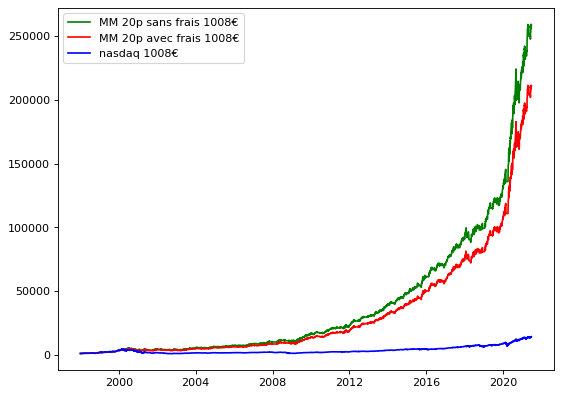

In [334]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(df['Date'], df[portefeuille], color="g", label="MM 20p sans frais 1008€")
plt.plot(df['Date'], df[portefeuille_frais], color="r", label="MM 20p avec frais 1008€")
plt.plot(df['Date'], df.Close, color="b", label="nasdaq 1008€")
plt.legend(loc="upper left")
plt.show()

In [335]:
model_mm20.stats(portefeuille, portefeuille_frais)

Départ : 1008€

Stratégie sans frais final : 258846€
Stratégie avec frais final: 211075€
Sans stratégie final: 14137€

Total frais: 1360€
Total transactions: 544


<h1>Partie 3 : Moyenne mobile VIX 100 périodes (VIX100)</h1>

In [336]:
#chargement dataset VIX
start_date = '1998-01-01'
end_date = datetime.now()
df_vix = pdr.DataReader('^VIX', 'yahoo', start_date, end_date)

#on passe l'index Date en colomne
df_vix = df_vix.rename_axis('Date').reset_index()

len(df), len(df_vix)

(5905, 5905)

In [337]:
#on créé les columns (différentes pour chaque modèle)
indicator, activity, portefeuille, portefeuille_frais = "VIX100_indicator", "VIX100_acivity", "VIX100_pf", "VIX100_pf_frais"
df[indicator], df[activity], df[portefeuille], df[portefeuille_frais] = 0,0,0,0

In [338]:
#indicateur VIX100
df[indicator] = df_vix.Close.rolling(window=100).mean()

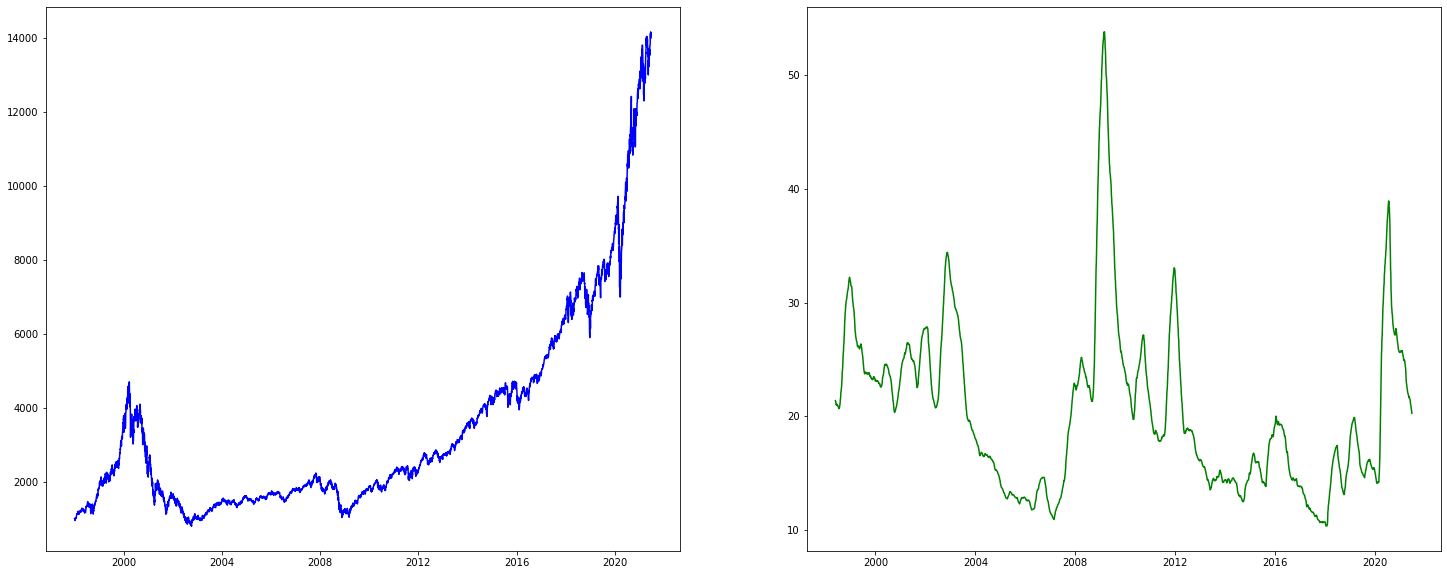

In [339]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25, 10))
ax1.plot(df.Date, df.Close, color="b")
ax2.plot(df.Date, df[indicator], color="g")
plt.show()

In [340]:
model_vix100 = InverseModel(df, indicator, activity, portefeuille, portefeuille_frais, frais = 2.5)

1998-06-11 00:00:00 || GO SELL || 110 || 1185.1099853515625 || 1185.1099853515625 || 1182.6099853515625
1998-06-17 00:00:00 || GO BUY || 114 || 1224.0799560546875|| 1198.0092076478986 || 1192.9819966243315

1998-07-21 00:00:00 || GO SELL || 137 || 1431.8900146484375 || 1401.3932777862376 || 1393.0126053427666
1998-12-22 00:00:00 || GO BUY || 245 || 1767.8199462890625|| 1386.1192420882428 || 1375.3299120909671

1999-01-13 00:00:00 || GO SELL || 259 || 1948.7099609375 || 1527.9521988506983 || 1513.5588638526021
1999-01-14 00:00:00 || GO BUY || 260 || 1906.1199951171875|| 1494.5580903232212 || 1477.9793283800677

1999-04-19 00:00:00 || GO SELL || 324 || 1967.5799560546875 || 1542.7478591129054 || 1523.1345400253795
1999-04-26 00:00:00 || GO BUY || 329 || 2260.659912109375|| 1577.7982356626837 || 1555.239312832882

1999-05-04 00:00:00 || GO SELL || 335 || 2097.550048828125 || 1463.9578242298091 || 1440.526560119849
1999-05-05 00:00:00 || GO BUY || 336 || 2155.77001953125|| 1504.59169691613

2001-06-15 00:00:00 || GO SELL || 870 || 1701.530029296875 || 3311.1931184697396 || 2995.2489601236607
2001-06-19 00:00:00 || GO BUY || 872 || 1675.9000244140625|| 3329.890164718403 || 3009.6619900587957

2001-07-09 00:00:00 || GO SELL || 885 || 1697.050048828125 || 3371.9137086374762 || 3045.144222674416
2001-07-12 00:00:00 || GO BUY || 888 || 1750.1300048828125|| 3594.9262559528242 || 3244.04480072054

2001-09-05 00:00:00 || GO SELL || 926 || 1415.300048828125 || 2907.155063560105 || 2620.9032626438147
2001-12-05 00:00:00 || GO BUY || 986 || 1720.9100341796875|| 3061.276447592085 || 2757.349149402925

2001-12-07 00:00:00 || GO SELL || 988 || 1673.9000244140625 || 2977.6517183277338 || 2679.5267863123654
2001-12-18 00:00:00 || GO BUY || 995 || 1657.6800537109375|| 3009.128572869684 || 2705.3521523633626

2001-12-24 00:00:00 || GO SELL || 999 || 1577.31005859375 || 2863.23573415987 || 2571.6874328573444
2001-12-26 00:00:00 || GO BUY || 1000 || 1590.8399658203125|| 2887.7961011212647 ||

2005-10-07 00:00:00 || GO SELL || 1953 || 1555.9200439453125 || 3032.763219923118 || 2528.78065612257
2005-11-16 00:00:00 || GO BUY || 1981 || 1651.449951171875|| 3045.93202801498 || 2537.2610804920446

2005-11-29 00:00:00 || GO SELL || 1989 || 1676.8399658203125 || 3092.7613362568472 || 2573.769889662974
2005-12-14 00:00:00 || GO BUY || 2000 || 1698.97998046875|| 3080.450198152811 || 2561.0246644048234

2005-12-16 00:00:00 || GO SELL || 2002 || 1688.6800537109375 || 3061.775221527537 || 2542.9986624674475
2005-12-20 00:00:00 || GO BUY || 2004 || 1665.0699462890625|| 3063.0812735990967 || 2541.583421612318

2006-01-20 00:00:00 || GO SELL || 2024 || 1676.3800048828125 || 3083.8873837322076 || 2556.347235353839
2006-01-24 00:00:00 || GO BUY || 2026 || 1686.219970703125|| 3102.1370532584406 || 2568.975055028968

2006-01-25 00:00:00 || GO SELL || 2027 || 1677.0 || 3085.1750831447816 || 2552.4283261585056
2006-01-26 00:00:00 || GO BUY || 2028 || 1690.489990234375|| 3109.9926035639587 || 257

2012-05-16 00:00:00 || GO SELL || 3616 || 2561.56005859375 || 8879.417366435682 || 6924.436347370017
2012-05-22 00:00:00 || GO BUY || 3620 || 2539.199951171875|| 8857.684850415837 || 6904.988678661881

2012-05-30 00:00:00 || GO SELL || 3625 || 2537.39990234375 || 8851.405602801826 || 6897.593705040955
2012-06-08 00:00:00 || GO BUY || 3632 || 2559.2099609375|| 8934.494291750334 || 6959.841841503025

2012-06-11 00:00:00 || GO SELL || 3633 || 2517.179931640625 || 8787.762658720323 || 6843.040021423819
2012-06-19 00:00:00 || GO BUY || 3639 || 2620.830078125|| 8883.72414557562 || 6915.265332127847

2012-06-21 00:00:00 || GO SELL || 3641 || 2556.9599609375 || 8667.226133371305 || 6744.239027873262
2012-06-22 00:00:00 || GO BUY || 3642 || 2585.530029296875|| 8764.068965054046 || 6817.095456210785

2012-06-25 00:00:00 || GO SELL || 3643 || 2533.5400390625 || 8587.840549702607 || 6677.516898940428
2012-06-29 00:00:00 || GO BUY || 3647 || 2615.719970703125|| 8855.532649703082 || 6883.16218425641

2015-04-10 00:00:00 || GO BUY || 4344 || 4422.02001953125|| 12020.378623321396 || 9078.648032789804

2015-04-13 00:00:00 || GO SELL || 4345 || 4409.2099609375 || 11985.557036398746 || 9049.848284543888
2015-04-14 00:00:00 || GO BUY || 4346 || 4397.64013671875|| 11954.106779027594 || 9023.601365076196

2015-04-17 00:00:00 || GO SELL || 4349 || 4351.7998046875 || 11829.498987836996 || 8927.04071667549
2015-04-24 00:00:00 || GO BUY || 4354 || 4536.77978515625|| 11987.267115252163 || 9043.59922445143

2015-04-29 00:00:00 || GO SELL || 4357 || 4488.14990234375 || 11858.775228349443 || 8944.16060470021
2015-05-04 00:00:00 || GO BUY || 4360 || 4482.60986328125|| 11868.173703775741 || 8948.749150695345

2015-06-29 00:00:00 || GO SELL || 4399 || 4379.8701171875 || 11596.159589205909 || 8741.147157963345
2015-07-01 00:00:00 || GO BUY || 4401 || 4429.22998046875|| 11681.79760749559 || 8803.200815959157

2015-07-08 00:00:00 || GO SELL || 4405 || 4351.580078125 || 11477.001187480955 || 8646.3697727

2017-11-20 00:00:00 || GO BUY || 5004 || 6308.60986328125|| 16417.18647621233 || 12132.049219134236

2017-11-30 00:00:00 || GO SELL || 5011 || 6365.56005859375 || 16565.39059670231 || 12239.069793007733
2017-12-08 00:00:00 || GO BUY || 5017 || 6344.56982421875|| 16639.585465043576 || 12291.387466434195

2017-12-12 00:00:00 || GO SELL || 5019 || 6383.64990234375 || 16742.078828338163 || 12364.597624216569
2017-12-15 00:00:00 || GO BUY || 5022 || 6466.31982421875|| 16942.27830737602 || 12509.95178428007

2017-12-27 00:00:00 || GO SELL || 5029 || 6435.14990234375 || 16860.61060370823 || 12447.14944378717
2018-01-02 00:00:00 || GO BUY || 5032 || 6511.33984375|| 17163.533188061476 || 12668.278514285588

2018-01-16 00:00:00 || GO SELL || 5041 || 6737.14013671875 || 17758.73032340423 || 13105.089173624174
2018-01-17 00:00:00 || GO BUY || 5042 || 6810.27978515625|| 17951.522408204586 || 13244.86046314017

2018-01-24 00:00:00 || GO SELL || 5047 || 6919.35009765625 || 18239.025744437742 || 13454

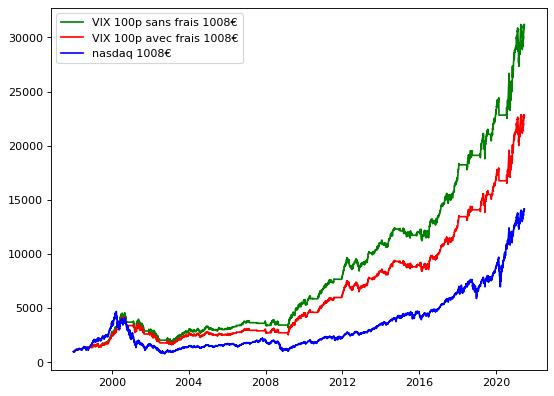

In [341]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(df['Date'], df[portefeuille], color="g", label="VIX 100p sans frais 1008€")
plt.plot(df['Date'], df[portefeuille_frais], color="r", label="VIX 100p avec frais 1008€")
plt.plot(df['Date'], df.Close, color="b", label="nasdaq 1008€")
plt.legend(loc="upper left")
plt.show()

In [342]:
model_vix100.stats(portefeuille, portefeuille_frais)

Départ : 1008€

Stratégie sans frais final : 31147€
Stratégie avec frais final: 22822€
Sans stratégie final: 14137€

Total frais: 1235€
Total transactions: 494


### Loic Part

In [113]:

# plt.style.use("fivethirtyeight")
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

In [73]:
tech_list = ['AAPL','MSFT', 'AMZN']

end = datetime.now()
start = '1998-01-01'

for stock in tech_list:   
    globals()[stock] = pdr.DataReader(stock, 'yahoo', start, end)

In [74]:
company_list = [AAPL, MSFT, AMZN]
company_name = ["APPLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
# df = pd.concat(company_list, axis=0)

(5906, 5906, 5906)

Date          High           Low          Open         Close  \
0    1998-01-02   1008.229980    987.719971    990.799988   1008.229980   
1    1998-01-05   1028.619995   1007.250000   1008.229980   1017.419983   
2    1998-01-06   1018.219971   1001.940002   1017.419983   1006.289978   
3    1998-01-07   1006.289978    978.700012   1006.289978    991.190002   
4    1998-01-08   1003.710022    982.270020    990.969971    994.549988   
5    1998-01-09    995.510010    950.140015    994.539978    956.190002   
6    1998-01-12    971.320007    933.010010    956.190002    971.169983   
7    1998-01-13    995.049988    971.169983    971.169983    995.049988   
8    1998-01-14   1001.940002    983.900024    995.049988    996.369995   
9    1998-01-15   1004.359985    986.979980    996.369995    995.580017   
10   1998-01-16   1008.619995    995.580017    995.580017   1005.869995   
11   1998-01-20   1026.880005   1005.869995   1005.869995   1026.880005   
12   1998-01-21   1029.790039   1017.369995   1026.880005   1026.520020   
13   1998-01-22   1029.239990   1014.469971   1026.739990   1020.630005   
14   1998-01-23   1028.660034   1015.450012   1020.630005   1024.469971   
15   1998-01-26   1026.900024   1009.679993   1024.469971   1016.400024   
16   1998-01-27   1038.780029   1014.359985   1016.400024   1035.760010   
17   1998-01-28   1064.900024   1035.760010   1035.760010   1063.199951   
18   1998-01-29   1082.079956   1059.599976   1063.219971   1069.000000   
19   1998-01-30   1080.260010   1066.699951   1069.000000   1071.130005   
20   1998-02-02   1103.619995   1071.130005   1071.130005   1100.989990   
21   1998-02-03   1113.540039   1096.420044   1100.989990   1111.260010   
22   1998-02-04   1127.770020   1107.459961   1111.250000   1124.439941   
23   1998-02-05   1143.489990   1113.079956   1124.439941   1114.859985   
24   1998-02-06   1134.390015   1110.459961   1114.859985   1134.319946   
25   1998-02-09   1138.979980   1119.439941   1134.319946   1122.719971   
26   1998-02-10   1144.979980   1121.969971   1122.680054   1139.790039   
27   1998-02-11   1145.479980   1132.500000   1139.790039   1138.810059   
28   1998-02-12   1146.280029   1122.479980   1138.810059   1144.800049   
29   1998-02-13   1144.800049   1136.510010   1144.800049   1136.689941   
30   1998-02-17   1147.699951   1125.770020   1136.640015   1128.630005   
31   1998-02-18   1140.739990   1125.819946   1128.619995   1140.739990   
32   1998-02-19   1161.290039   1140.760010   1140.760010   1156.750000   
33   1998-02-20   1163.839966   1144.229980   1156.760010   1159.729980   
34   1998-02-23   1185.780029   1159.729980   1159.729980   1185.530029   
35   1998-02-24   1194.989990   1172.339966   1185.530029   1172.400024   
36   1998-02-25   1200.650024   1172.400024   1172.400024   1200.390015   
37   1998-02-26   1207.839966   1196.469971   1200.390015   1206.969971   
38   1998-02-27   1213.089966   1194.089966   1206.920044   1194.130005   
39   1998-03-02   1204.119995   1176.760010   1194.130005   1177.589966   
40   1998-03-03   1177.589966   1160.930054   1177.589966   1175.719971   
41   1998-03-04   1181.219971   1166.810059   1175.719971   1179.869995   
42   1998-03-05   1179.869995   1123.859985   1179.869995   1126.829956   
43   1998-03-06   1163.109985   1126.750000   1126.750000   1163.109985   
44   1998-03-09   1163.109985   1128.369995   1163.109985   1128.369995   
45   1998-03-10   1148.800049   1128.369995   1128.369995   1148.609985   
46   1998-03-11   1163.849976   1146.780029   1148.609985   1153.869995   
47   1998-03-12   1166.430054   1147.520020   1153.869995   1163.270020   
48   1998-03-13   1180.959961   1163.270020   1163.270020   1169.290039   
49   1998-03-16   1181.410034   1169.369995   1169.369995   1180.170044   
50   1998-03-17   1180.170044   1158.859985   1180.170044   1167.890015   
51   1998-03-18   1177.619995   1157.339966   1167.890015   1177.010010   
52   1998-03-19   1186.219971   1176

/home/adrienfontaine/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/adrienfontaine/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


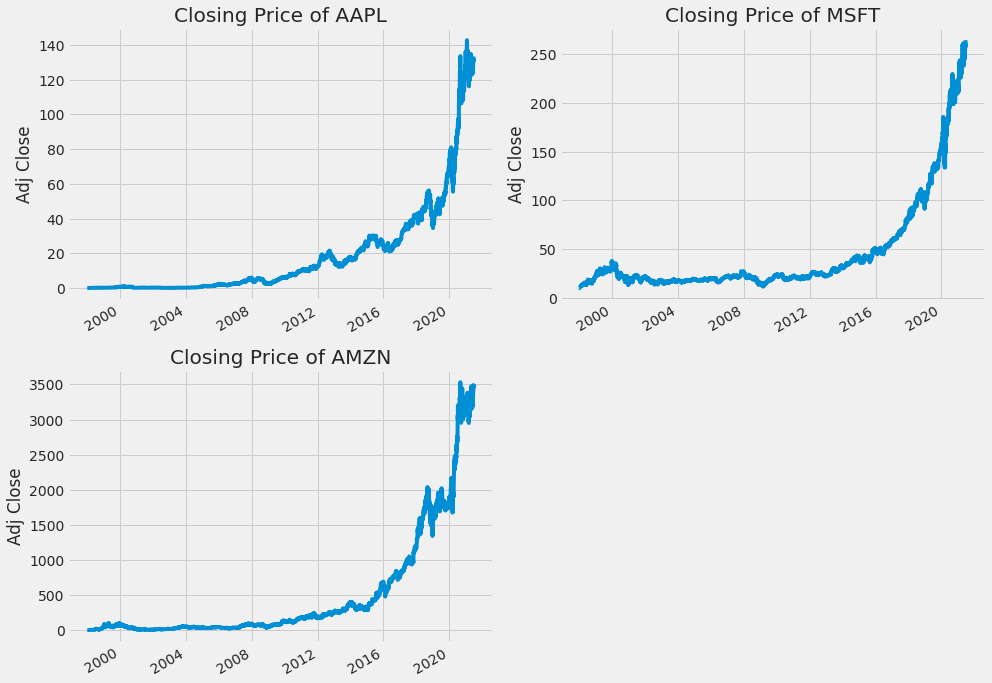

In [75]:
plt.figure(figsize=(14, 14))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3,2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

In [76]:
ma_day = [20, 50, 100]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

/home/adrienfontaine/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/adrienfontaine/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/adrienfontaine/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


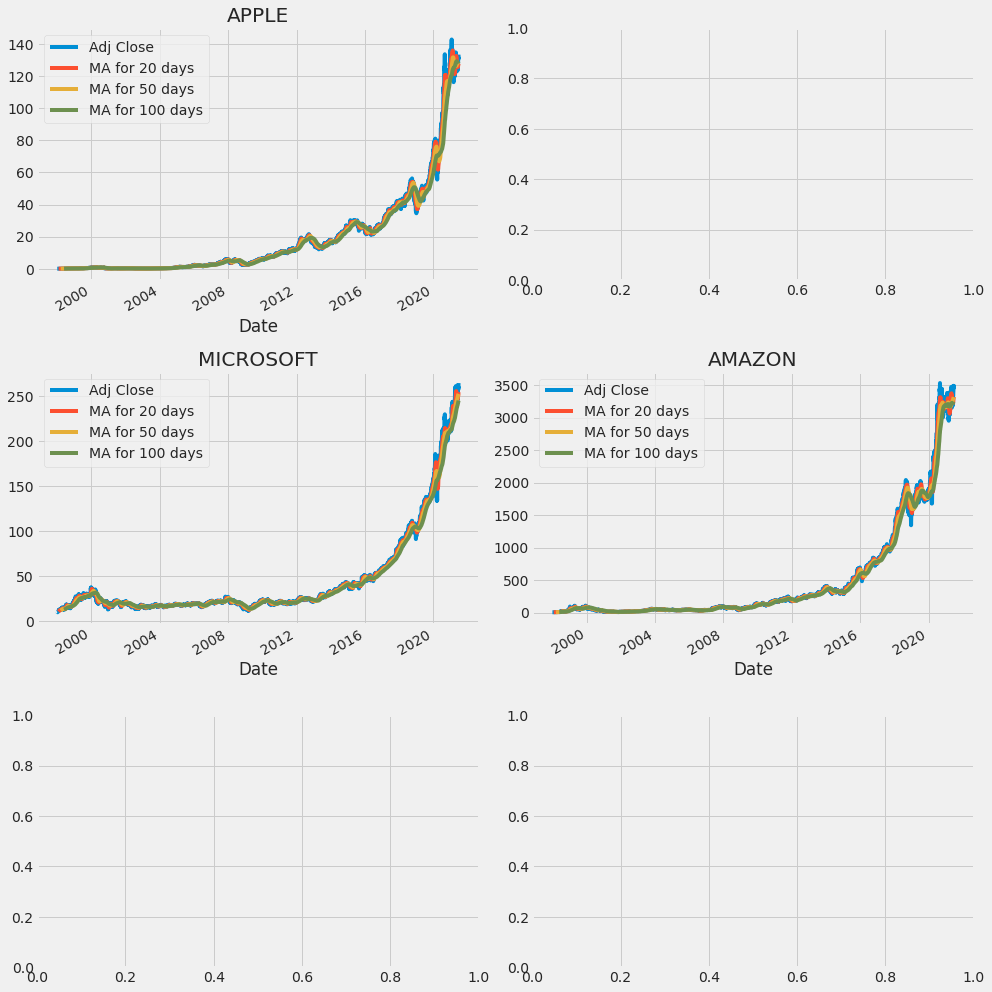

In [77]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(14)
fig.set_figwidth(14)

AAPL[['Adj Close', 'MA for 20 days', 'MA for 50 days', 'MA for 100 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

MSFT[['Adj Close', 'MA for 20 days', 'MA for 50 days', 'MA for 100 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 20 days', 'MA for 50 days', 'MA for 100 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')


fig.tight_layout()

In [78]:
df

Date          High           Low          Open         Close  \
0    1998-01-02   1008.229980    987.719971    990.799988   1008.229980   
1    1998-01-05   1028.619995   1007.250000   1008.229980   1017.419983   
2    1998-01-06   1018.219971   1001.940002   1017.419983   1006.289978   
3    1998-01-07   1006.289978    978.700012   1006.289978    991.190002   
4    1998-01-08   1003.710022    982.270020    990.969971    994.549988   
5    1998-01-09    995.510010    950.140015    994.539978    956.190002   
6    1998-01-12    971.320007    933.010010    956.190002    971.169983   
7    1998-01-13    995.049988    971.169983    971.169983    995.049988   
8    1998-01-14   1001.940002    983.900024    995.049988    996.369995   
9    1998-01-15   1004.359985    986.979980    996.369995    995.580017   
10   1998-01-16   1008.619995    995.580017    995.580017   1005.869995   
11   1998-01-20   1026.880005   1005.869995   1005.869995   1026.880005   
12   1998-01-21   1029.790039   1017.369995   1026.880005   1026.520020   
13   1998-01-22   1029.239990   1014.469971   1026.739990   1020.630005   
14   1998-01-23   1028.660034   1015.450012   1020.630005   1024.469971   
15   1998-01-26   1026.900024   1009.679993   1024.469971   1016.400024   
16   1998-01-27   1038.780029   1014.359985   1016.400024   1035.760010   
17   1998-01-28   1064.900024   1035.760010   1035.760010   1063.199951   
18   1998-01-29   1082.079956   1059.599976   1063.219971   1069.000000   
19   1998-01-30   1080.260010   1066.699951   1069.000000   1071.130005   
20   1998-02-02   1103.619995   1071.130005   1071.130005   1100.989990   
21   1998-02-03   1113.540039   1096.420044   1100.989990   1111.260010   
22   1998-02-04   1127.770020   1107.459961   1111.250000   1124.439941   
23   1998-02-05   1143.489990   1113.079956   1124.439941   1114.859985   
24   1998-02-06   1134.390015   1110.459961   1114.859985   1134.319946   
25   1998-02-09   1138.979980   1119.439941   1134.319946   1122.719971   
26   1998-02-10   1144.979980   1121.969971   1122.680054   1139.790039   
27   1998-02-11   1145.479980   1132.500000   1139.790039   1138.810059   
28   1998-02-12   1146.280029   1122.479980   1138.810059   1144.800049   
29   1998-02-13   1144.800049   1136.510010   1144.800049   1136.689941   
30   1998-02-17   1147.699951   1125.770020   1136.640015   1128.630005   
31   1998-02-18   1140.739990   1125.819946   1128.619995   1140.739990   
32   1998-02-19   1161.290039   1140.760010   1140.760010   1156.750000   
33   1998-02-20   1163.839966   1144.229980   1156.760010   1159.729980   
34   1998-02-23   1185.780029   1159.729980   1159.729980   1185.530029   
35   1998-02-24   1194.989990   1172.339966   1185.530029   1172.400024   
36   1998-02-25   1200.650024   1172.400024   1172.400024   1200.390015   
37   1998-02-26   1207.839966   1196.469971   1200.390015   1206.969971   
38   1998-02-27   1213.089966   1194.089966   1206.920044   1194.130005   
39   1998-03-02   1204.119995   1176.760010   1194.130005   1177.589966   
40   1998-03-03   1177.589966   1160.930054   1177.589966   1175.719971   
41   1998-03-04   1181.219971   1166.810059   1175.719971   1179.869995   
42   1998-03-05   1179.869995   1123.859985   1179.869995   1126.829956   
43   1998-03-06   1163.109985   1126.750000   1126.750000   1163.109985   
44   1998-03-09   1163.109985   1128.369995   1163.109985   1128.369995   
45   1998-03-10   1148.800049   1128.369995   1128.369995   1148.609985   
46   1998-03-11   1163.849976   1146.780029   1148.609985   1153.869995   
47   1998-03-12   1166.430054   1147.520020   1153.869995   1163.270020   
48   1998-03-13   1180.959961   1163.270020   1163.270020   1169.290039   
49   1998-03-16   1181.410034   1169.369995   1169.369995   1180.170044   
50   1998-03-17   1180.170044   1158.859985   1180.170044   1167.890015   
51   1998-03-18   1177.619995   1157.339966   1167.890015   1177.010010   
52   1998-03-19   1186.219971   1176

In [118]:
#calculs moyennes mobiles qu'on met sous la même echelle
df_mm_gafam = df
df_mm_gafam['AAPL'] = AAPL.reset_index().Close.rolling(window=20).mean()/AAPL.Close.values[-1]
df_mm_gafam['MSFT'] = MSFT.reset_index().Close.rolling(window=20).mean()/MSFT.Close.values[-1]
df_mm_gafam['AMZN'] = AMZN.reset_index().Close.rolling(window=20).mean()/AMZN.Close.values[-1]

#sommes des moyennes
df_mm_gafam['GAFAS'] = df_mm_gafam['AMZN'] +df_mm_gafam['MSFT'] + df_mm_gafam['AAPL']


0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11           NaN
12           NaN
13           NaN
14           NaN
15           NaN
16           NaN
17           NaN
18           NaN
19      0.066960
20      0.067529
21      0.068145
22      0.068752
23      0.069368
24      0.070026
25      0.070750
26      0.071471
27      0.072112
28      0.072768
29      0.073367
30      0.073827
31      0.074231
32      0.074660
33      0.075054
34      0.075657
35      0.076203
36      0.076807
37      0.077359
38      0.077899
39      0.078346
40      0.078709
41      0.078950
42      0.079065
43      0.079344
44      0.079412
45      0.079595
46      0.079687
47      0.079845
48      0.080031
49      0.080229
50      0.080423
51      0.080683
52      0.080945
53      0.081192
54      0.081337
55      0.081515
56      0.081733
57      0.081885
58      0.0820

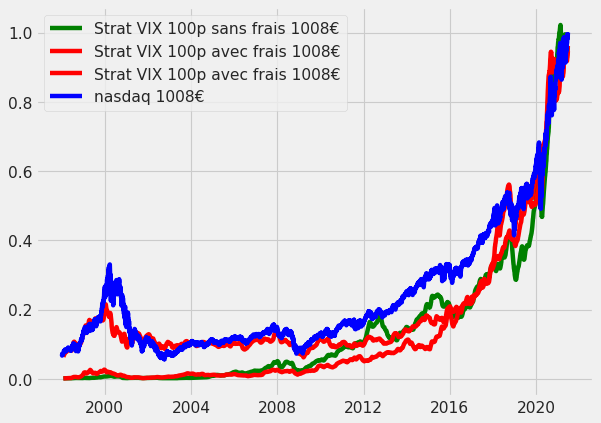

(5906, 10)